In [141]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import os
import sklearn
import pickle

In [142]:
#load and read csv file
data_module= pd.read_csv("bike_sharing.csv")
data_module.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [143]:
data_module.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [144]:
data_module.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [145]:
# Imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
data_module= data_module[['temp','cnt']]

In [146]:
data_module.dtypes

temp    float64
cnt       int64
dtype: object

In [147]:
data_module.isnull().sum()

temp    0
cnt     0
dtype: int64

In [148]:
#split dataset into train and test
train,test=train_test_split(data_module,test_size=0.3,random_state=0)
print("train",train.shape)
print("test",test.shape)

train (12165, 2)
test (5214, 2)


In [149]:
#save datafile into csv file
train.to_csv("train.csv",index=False)
test.to_csv("test.csv",index= False)

In [150]:
train_module= pd.read_csv("train.csv")
train_module.head()

,temp,cnt
0,0.36,250
1,0.54,18
2,0.62,107
3,0.36,145
4,0.76,857


In [151]:
# splitting training data into train and cross validation dataset 
train_data,cv_data=train_test_split(train_module,test_size=0.3,random_state=0)

In [152]:
x_train= train_data.iloc[:,:-1].values
y_train=train_data.iloc[:,1].values

In [153]:
print("x train data:",x_train.shape)
# print(x_train)
print("y train data:",y_train.shape)

x train data: (8515, 1)
y train data: (8515,)


In [154]:
#feature scalling on cross-validate data
sc_x= StandardScaler()
sc_y= StandardScaler()
x_train= sc_x.fit_transform(x_train.reshape(-1,1))
y_train=sc_y.fit_transform(y_train.reshape(-1,1))

In [155]:
#fitting linear regression to the dataset
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [156]:
#fitting polynomialfeature
poly_reg = PolynomialFeatures(degree=4)
x_poly=poly_reg.fit_transform(x_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [157]:
y_predict_train = lin_reg2.predict(poly_reg.fit_transform(x_train))
print(y_predict_train)


[[ 0.18700223]
 [ 0.47258366]
 [ 0.05537191]
 ...
 [ 0.32709454]
 [-0.47806045]
 [-0.40049193]]


In [158]:
y_predict_train

array([[ 0.18700223],
       [ 0.47258366],
       [ 0.05537191],
       ...,
       [ 0.32709454],
       [-0.47806045],
       [-0.40049193]])

In [159]:
# Accuracy = sklearn.metrics.r2_score(y_train,y_predict_train)*100 
# print(Accuracy)
accuracy= mean_squared_error(y_train,y_predict_train)*100
print(accuracy)


83.65776722437877


In [160]:
file = open("train_data.pkl",'wb')
pickle.dump(lin_reg,file)
file.close()

In [161]:
file1= open("train_data.pkl",'rb')
lin_reg1=pickle.load(file1)

In [162]:
cv_data.to_csv('cv_data.csv',index=False)

In [163]:
cv_data_x= cv_data.iloc[:,:-1].values
cv_data_y=cv_data.iloc[:,1].values

In [164]:
print("cross validate data x",cv_data_x.shape)
print("cross validate data y",cv_data_y.shape)

cross validate data x (3650, 1)
cross validate data y (3650,)


In [165]:
#feature scalling on cross-validate data
sc_cv_x= StandardScaler()
sc_cv_y= StandardScaler()
cv_data_x= sc_cv_x.fit_transform(cv_data_x.reshape(-1,1))
# cv_data_x= sc_x.fit_transform(cv_data_x)
# cv_data_x= sc_x.fit_transform(cv_data_y)
cv_data_y=sc_cv_y.fit_transform(cv_data_y.reshape(-1,1))

In [166]:
y_predict_cv =lin_reg2.predict(poly_reg.fit_transform(cv_data_x))

In [167]:
y_predict_cv

array([[-0.3501548 ],
       [ 0.4382254 ],
       [ 0.4382254 ],
       ...,
       [ 0.0690393 ],
       [-0.46347049],
       [-0.46347049]])

In [172]:
# Accuracy = sklearn.metrics.r2_score(cv_data_y,y_predict_cv)*100
# print(Accuracy)
accuracy= mean_squared_error(cv_data_y,y_predict_cv)*100
accuracy

84.30201193193608

In [169]:
file1= open("train_data.pkl",'rb')
lin_reg1=pickle.load(file1)

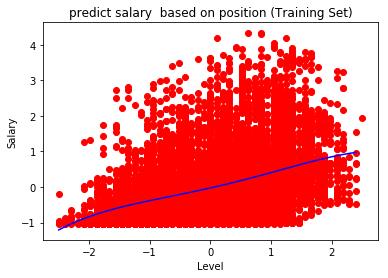

In [170]:
# visualizing the training set result
x_grid=np.arange(min(x_train),max(x_train),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('predict number of bikes getting shared (Training Set)')
plt.xlabel('temprature')
plt.ylabel('bike count')
plt.show()


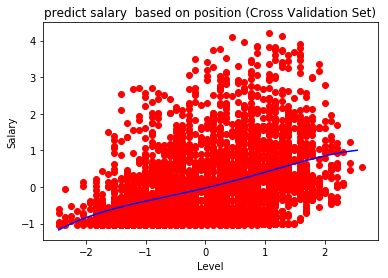

In [171]:
     
# visualizing the testing set result
x_grid=np.arange(min(cv_data_x),max(cv_data_x),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(cv_data_x,cv_data_y,color='red')
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
plt.title('predict salary  based on position (Cross Validation Set)')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()